# Chapter 6. Statistical machine learning

Statistical machine learning is distinguished from classical statistical methods in that they are data-driven and do not seek to impose linear or other overall structure on the data

**Machine learning versus statistics:** In the context of prediction modeling, there is not a bright line dividing the two disciplines. Machine learning tends to be focused more on developing efficient algorithms that scale to large data in order to optimize the predictive model. Statistics generally pays more attention to the probabilistic theory and underlying structure of the model. Bagging, and the random forest, grew up firmly in the statistic camp. Boosting, on the other hand, has been developed in both disciplines but receives more attention on the machine learning side of the divide. Regardless of the history, the promise of boosting ensures that it will thrive as a technique in both statistics and machine learning

## 6.1 K-nearest neighbors

For each record to be classified or predicted:
1. Find K records that have similar features (i.e. similar predictor values)
2. For classification, find out what the majority class is among those similar records and assign that class to the new record
3. For prediction (also called KNN regression), find the average among those similar records, and predict that average for the new record

There is no model to be fit. But the prediction results depend on how the features are scaled, how similarity is measured, and how big K is set. Also, all predictors must be in numeric form

### A small example: predicting load default

In [1]:
import pandas as pd
import numpy as np

loan200 = pd.read_csv('/Users/boyuan/Desktop/OneDrive/practical-statistics-for-data-scientists-master/data/loan200.csv')
loan200.head()

,outcome,payment_inc_ratio,dti
0,target,9.00000,22.50
1,default,5.46933,21.33
2,paid off,6.90294,8.97
3,paid off,11.14800,1.83
4,default,3.72120,10.81


In [2]:
from sklearn.neighbors import KNeighborsClassifier

predictors = ['payment_inc_ratio', 'dti']
outcome = 'outcome'

newloan = loan200.loc[0:0, predictors]
X = loan200.loc[1:, predictors]
y = loan200.loc[1:, outcome]

knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(X, y)
print(knn.predict(newloan))
print(knn.predict_proba(newloan))

['paid off']
[[0.45 0.55]]


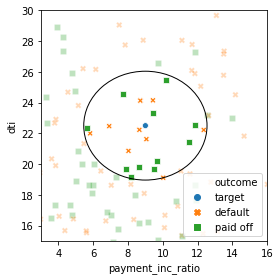

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib.patches import Ellipse

nbrs = knn.kneighbors(newloan)
maxDistance = np.max(nbrs[0][0])

fig, ax = plt.subplots(figsize=(4, 4))
sns.scatterplot(x='payment_inc_ratio', y='dti', style='outcome', 
                hue='outcome', data=loan200, alpha=0.3, ax=ax)
sns.scatterplot(x='payment_inc_ratio', y='dti', style='outcome', 
                hue='outcome', 
                data=pd.concat([loan200.loc[0:0, :], loan200.loc[nbrs[1][0] + 1,:]]), 
                ax=ax, legend=False)
ellipse = Ellipse(xy=newloan.values[0], 
                  width=2 * maxDistance, height=2 * maxDistance,
                  edgecolor='black', fc='None', lw=1)
ax.add_patch(ellipse)
ax.set_xlim(3, 16)
ax.set_ylim(15, 30)

plt.tight_layout()
plt.show()

### Distance metrics

Similarity (nearness) is determined using a distance metric, which is a function that measures how far two records (x , x , …, x ) and (u , u , …, u ) are from one another. The most popular distance metric between two vectors is Euclidean distance. To measure the Euclidean distance between two vectors, subtract one from the other, square the differences, sum them, and take the square root:

√(x1 − u1)^2 + (x2 − u2)^2 +⋯+ (xp − up)^2.

Another common distance metric for numeric data is Manhattan distance:

|x1 − u1| + |x2 − u2| +⋯+ |xp − up|

Euclidean distance corresponds to the straight-line distance between two points (e.g., as the crow flies). Manhattan distance is the distance between two points traversed in a single direction at a time (e.g., traveling along rectangular city blocks). For this reason, Manhattan distance is a useful approximation if similarity is defined as point-to-point travel time.

In measuring distance between two vectors, variables (features) that are measured with comparatively large scale will dominate the measure. To address the problem by standardizing the data

**Other distance metrics:** There are numerous other metrics for measuring distance between vectors. For numeric data, Mahalanobis distance is attractive since it accounts for the correlation between two variables. This is useful since if two variables are highly correlated, Mahalanobis will essentially treat these as a single variable in terms of distance. Euclidean and Manhattan distance do not account for the correlation, effectively placing greater weight on the attribute that underlies those features. Mahalanobis distance is the Euclidean distance between the principal components. The downside of using Mahalanobis distance is increased computational effort and complexity; it is computed using the covariance matrix

### One hot encoder

In linear and logistic regression, one hot encoding causes problems with multicollinearity. In such cases, one dummy is omitted (its value can be inferred from the other values). This is not an issue with KNN

### Standardization (normalization, z-scores)

Standardization, also called normalization, puts all variables on similar scales by subtracting the mean and dividing by the standard deviation. in this way, we ensure that a variable does not overly influence a model simply due to the scale of its original measurement:

The result of this transformation is commonly referred to as a z-score. Measurements are then stated in terms of “standard deviations away from the mean.”

Note: Normalization in this statistical context is not to be confused with database normalization, which is the removal of redundant data and the verification of data dependencies.

For KNN and a few other procedures (e.g., principal components analysis and clustering), it is essential to consider standardizing the data prior to applying the procedure

The sklearn.preprocessing.StandardScaler method is first trained with the predictors and is subsequently used to transform the data set prior to training the KNN model

In [4]:
import pandas as pd
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

loan_data = pd.read_csv('/Users/boyuan/Desktop/OneDrive/practical-statistics-for-data-scientists-master/data/loan_data.csv.gz', compression = 'gzip')

loan_data = loan_data.drop(columns=['Unnamed: 0', 'status'])
loan_data['outcome'] = pd.Categorical(loan_data['outcome'], 
                                      categories=['paid off', 'default'], 
                                      ordered=True)

predictors = ['payment_inc_ratio', 'dti', 'revol_bal', 'revol_util']
outcome = 'outcome'

newloan = loan_data.loc[0:0, predictors]

X = loan_data.loc[1:, predictors]
y = loan_data.loc[1:, outcome]

scaler = preprocessing.StandardScaler()
scaler.fit(X * 1.0)
X_std = scaler.transform(X * 1.0)
newloan_std = scaler.transform(newloan * 1.0)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_std, y)

nbrs = knn.kneighbors(newloan_std)
X.iloc[nbrs[1][0], :]

,payment_inc_ratio,dti,revol_bal,revol_util
2080,2.61091,1.03,1218,9.7
1438,2.34343,0.51,278,9.9
30215,2.71200,1.34,1075,8.5
28542,2.39760,0.74,2917,7.4
44737,2.34309,1.37,488,7.2


Using the z-score is just one way to rescale variables. Instead of the mean, a more robust estimate of location could be used, such as the median. Likewise, a different estimate of scale such as the interquartile range could be used instead of the standard deviation. Sometimes, variables are “squashed” into the 0–1 range. It’s also important to realize that scaling each variable to have unit variance is somewhat arbitrary. This implies that each variable is thought to have the same importance in predictive power. If you have subjective knowledge that some variables are more important than others, then these could be scaled up. For example, with the loan data, it is reasonable to expect that the payment-to-income ratio is very important.

**Note:** Normalization (standardization) does not change the distributional shape of the data; it does not make it normally shaped if it was not already normally shaped

### Choosing K

Generally speaking, if K is too low, we may be overfitting: including the noise in the data. Higher values of K provide smoothing that reduces the risk of overfitting in the training data. On the other hand, if K is too high, we may oversmooth the data and miss out on KNN’s ability to capture the local structure in the data, one of its main advantages

The K that best balances between overfitting and oversmoothing is typically determined by accuracy metrics and, in particular, accuracy with holdout or validation data. There is no general rule about the best K—it depends greatly on the nature of the data. For highly structured data with little noise, smaller values of K work best. Borrowing a term from the signal processing community, this type of data is sometimes referred to as having a high signal-to-noise ratio (SNR). Examples of data with a typically high SNR are data sets for handwriting and speech recognition. For noisy data with less structure (data with a low SNR), such as the loan data, larger values of K are appropriate. Typically, values of K fall in the range 1 to 20. Often, an odd number is chosen to avoid ties

**Bias variance trade-off:** The tension between oversmoothing and overfitting is an instance of the bias-variance trade-off, a ubiquitous problem in statistical model fitting. Variance refers to the modeling error that occurs because of the choice of training data; that is, if you were to choose a different set of training data, the resulting model would be different. Bias refers to the modeling error that occurs because you have not properly identified the underlying realworld scenario; this error would not disappear if you simply added more training data. When a flexible model is overfit, the variance increases. You can reduce this by using a simpler model, but the bias may increase due to the loss of flexibility in modeling the real underlying situation. A general approach to handling this trade-off is through cross validation

### KNN as a feature engine

KNN can be used to add “local knowledge” in a staged process with other classification techniques:
1. KNN is run on the data, and for each record, a classification (or quasi-probability of a class) is derived
2. That result is added as a new feature to the record, and another classification method is then run on the data. The original predictor variables are thus used twice.

At first you might wonder whether this process, since it uses some predictors twice, causes a problem with multicollinearity. This is not an issue, since the information being incorporated into the second-stage model is highly local, derived only from a few nearby records, and is therefore additional information and not redundant.

You can think of this staged use of KNN as a form of ensemble learning, in which multiple predictive modeling methods are used in conjunction with one another. It can also be considered as a form of feature engineering in which the aim is to derive features (predictor variables) that have predictive power. Often this involves some manual review of the data; KNN gives a fairly automatic way to do this.

For example, consider the King County housing data. In pricing a home for sale, a realtor will base the price on similar homes recently sold, known as “comps.” In essence, realtors are doing a manual version of KNN: by looking at the sale prices of similar homes, they can estimate what a home will sell for. We can create a new feature for a statistical model to mimic the real estate professional by applying KNN to recent sales. The predicted value is the sales price, and the existing predictor variables could include location, total square feet, type of structure, lot size, and number of bedrooms and bathrooms. The new predictor variable (feature) that we add via KNN is the KNN predictor for each record (analogous to the realtors’ comps). Since we are predicting a numerical value, the average of the K-Nearest Neighbors is used instead of a majority vote (known as KNN regression).

In [5]:
predictors = ['dti', 'revol_bal', 'revol_util', 'open_acc', 'delinq_2yrs_zero', 'pub_rec_zero']
outcome = 'outcome'

X = loan_data[predictors]
y = loan_data[outcome]

knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X, y)

loan_data['borrower_score'] = knn.predict_proba(X)[:,1]
loan_data['borrower_score'].describe()

count    45342.000000
mean         0.498896
std          0.128734
min          0.050000
25%          0.400000
50%          0.500000
75%          0.600000
max          1.000000
Name: borrower_score, dtype: float64

The result is a feature that predicts the likelihood a borrower will default based on his credit history.

## 6.2 Tree models

Tree models, also called Classification and Regression Trees (CART), decision trees, or just trees, are an effective and popular classification and regression method initially developed by Leo Breiman and others in 1984. Tree models, and their more powerful descendants random forests and boosted trees form the basis for the most widely used and powerful predictive modeling tools in data science for regression and classification

**Terminologies**:

Recursive partitioning: Repeatedly dividing and subdividing the data with the goal of making the outcomes in each final subdivision as homogeneous as possible

Split value: a predictor value that divides the records into those where that predictor is less than the split value, and those where it is more

Node: In the decision tree, or in the set of corresponding branching rules, a node is the graphical or rule representation of a split value

Leaf: The end of a set of if-then rules, or branches of a tree - the rules that bring you to that leaf provide one of the classification rules for any record in a tree

Loss: The number of misclassifications at a stage in the splitting process, the more losses, the more impurity

Impurity: The extent to which a mix of classes is found in a subpartition of the data, the more mixed, the more impure 

Pruning: The process of taking a fully grown tree and progressively cutting its branches back to reduce overfitting

A tree model is a set of 'if-then-else' rules that are easy to understand and to implement. In contrast to linear and logistic regression, trees have the ability to discover hidden patterns corresponding to complex interactions in the data. However, unlike KNN or naive bayes, simple tree models can be expressed in terms of predictor relationships that are easily interpretable

**Decision trees in operations research:** The term decision trees has a different and older meaning in decision science and operations research, where it refers to a human decision analysis process. In this meaning, decision points, possible outcomes, and their estimated probabilities are laid out in a branching diagram, and the decision path with the maximum expected value is chosen

### A simple example

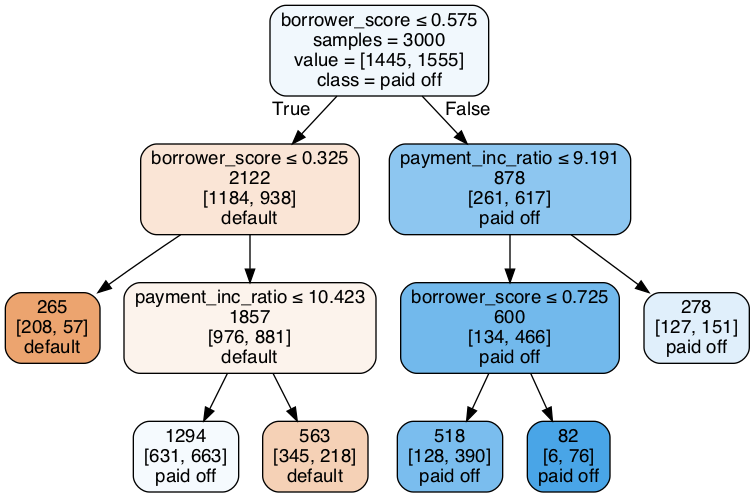

In [11]:
from sklearn.tree import DecisionTreeClassifier
from dmba import plotDecisionTree, textDecisionTree

loan3000 = pd.read_csv('/Users/boyuan/Desktop/OneDrive/practical-statistics-for-data-scientists-master/data/loan3000.csv')

predictors = ['borrower_score', 'payment_inc_ratio']
outcome = 'outcome'

X = loan3000[predictors]
y = loan3000[outcome]

loan_tree = DecisionTreeClassifier(random_state = 1, criterion = 'entropy', min_impurity_decrease = 0.003)
loan_tree.fit(X, y)

plotDecisionTree(loan_tree, feature_names = predictors, class_names = loan_tree.classes_)

In [12]:
print(textDecisionTree(loan_tree))

node=0 test node: go to node 1 if 0 <= 0.5750000178813934 else to node 6
  node=1 test node: go to node 2 if 0 <= 0.32500000298023224 else to node 3
    node=2 leaf node: [[0.785, 0.215]]
    node=3 test node: go to node 4 if 1 <= 10.42264986038208 else to node 5
      node=4 leaf node: [[0.488, 0.512]]
      node=5 leaf node: [[0.613, 0.387]]
  node=6 test node: go to node 7 if 1 <= 9.19082498550415 else to node 10
    node=7 test node: go to node 8 if 0 <= 0.7249999940395355 else to node 9
      node=8 leaf node: [[0.247, 0.753]]
      node=9 leaf node: [[0.073, 0.927]]
    node=10 leaf node: [[0.457, 0.543]]


### The recursive partitioning algorithm

<ipython-input-13-6243b4e8651f>:36: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


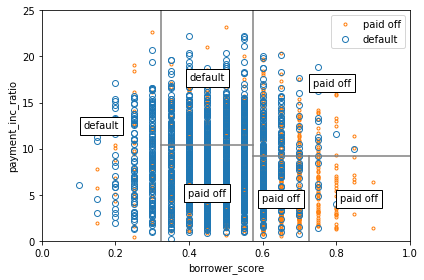

In [13]:
fig, ax = plt.subplots(figsize=(6, 4))

loan3000.loc[loan3000.outcome=='paid off'].plot(
    x='borrower_score', y='payment_inc_ratio', style='.', 
    markerfacecolor='none', markeredgecolor='C1', ax=ax)
loan3000.loc[loan3000.outcome=='default'].plot(
    x='borrower_score', y='payment_inc_ratio', style='o', 
    markerfacecolor='none', markeredgecolor='C0', ax=ax)
ax.legend(['paid off', 'default']);
ax.set_xlim(0, 1)
ax.set_ylim(0, 25)
ax.set_xlabel('borrower_score')
ax.set_ylabel('payment_inc_ratio')

x0 = 0.575
x1a = 0.325; y1b = 9.191
y2a = 10.423; x2b = 0.725
ax.plot((x0, x0), (0, 25), color='grey')
ax.plot((x1a, x1a), (0, 25), color='grey')
ax.plot((x0, 1), (y1b, y1b), color='grey')
ax.plot((x1a, x0), (y2a, y2a), color='grey')
ax.plot((x2b, x2b), (0, y1b), color='grey')

labels = [('default', (x1a / 2, 25 / 2)),
          ('default', ((x0 + x1a) / 2, (25 + y2a) / 2)),
          ('paid off', ((x0 + x1a) / 2, y2a / 2)),
          ('paid off', ((1 + x0) / 2, (y1b + 25) / 2)),
          ('paid off', ((1 + x2b) / 2, (y1b + 0) / 2)),
          ('paid off', ((x0 + x2b) / 2, (y1b + 0) / 2)),
         ]
for label, (x, y) in labels:
    ax.text(x, y, label, bbox={'facecolor':'white'},
            verticalalignment='center', horizontalalignment='center')

plt.tight_layout()
plt.show()

Suppose we have a response variable Y and a set of P predictor variables Xj for j = 1, ..., P. For a partition A of records, recursive partitioning will find the best way to partition A into two subpartitions:
1. For each predictor variable Xj:
        a. For each value sj of Xj:
                I. Split the records in A with Xj values < sj as one partition, and the remaining records where Xj > sj as another partition
                II. Measure the homogeneity of classes within each subpartition of A
        b. Select the value of sj that produces maximum within-partition homogeneity of A
2. Select the variable Xj and the split value sj that produces maximum within-partition homogeneity of class
The recursive part:
1. Initialize A with the entire data set
2. Apply the partition algorithm to split A into two subpartitions, A1 and A2
3. Repeat step 2 on subpartitions A1 and A2
4. The algorithm terminates when no further partition can be made that sufficiently improves the homogeneity of the partitions 

The end result is a partitioning of the data, in P-dimensions, with each partition predicting an outcome of 0 or 1 depending on the majority vote of the response in that partition 

In addition to a binary 0/1 prediction, tree models can produce a probability estimate based on the number of 0s and 1s in the partition. The estimate is simply the sum of 0s or 1s in the partition divided by the number of observations in the partition:

Prob (Y = 1) = Number of 1s in the partition / Size of the partition. 

The estimated Prob(Y = 1) can then be converted to a binary decision; for example, set the estimate to 1 if Prob(Y = 1) > 0.5

### Measuring homogeneity or impurity

**Gini impurity:** I(A) = p(1-p)

**Entropy:** I(A) = −p log2 (p) − (1 − p) log2 (1 − p)

Gini impurity (rescaled) and entropy measures are similar, with entropy giving higher impurity scores for moderate and high accuracy rates

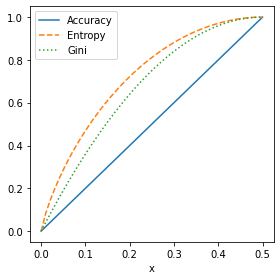

In [26]:
import math

def entropyFunction(x):
    if x == 0: return 0
    return -x * math.log(x, 2) - (1 - x) * math.log(1 - x, 2)

def giniFunction(x):
    return x * (1 - x)

x = np.linspace(0, 0.5, 50)
impure = pd.DataFrame({
    'x': x,
    'Accuracy': 2 * x,
    'Gini': [giniFunction(xi) / giniFunction(.5) for xi in x],
    'Entropy': [entropyFunction(xi) for xi in x],
})

fig, ax = plt.subplots(figsize=(4, 4))

impure.plot(x='x', y='Accuracy', ax=ax, linestyle='solid')
impure.plot(x='x', y='Entropy', ax=ax, linestyle='--')
impure.plot(x='x', y='Gini', ax=ax, linestyle=':')

plt.tight_layout()
plt.show()

**Gini coefficient:** Gini impurity is not to be confused with the Gini coefficient. They represent similar concepts, but the Gini coefficient is limited to the binary classification problem and is related to the AUC metric

The impurity metric is used in the splitting algorithm. For each proposed partition of the data, impurity is measured for each of the partitions that result from the split. A weighted average is then calculated, and whichever partition at each stage yields the lowest weighted average is selected

### Stopping the tree from growing

Determine when to stop growing a tree at a stage that will generalize to new data
1. Avoid splitting a partition if a resulting subpartition is too small, or if a terminal lead is too small
2. Don't split a partition if the new partition does not significantly reduce the impurity 

Combine cross-validation with either systematically changing the model parameters or modifying the tree through pruning

In python, use grid search over combinations of different parameter values. The grid search is a convenient way to combine the exhaustive search through all combinations with cross-validation. An optimal parameter set is then selected using the cross-validation model performance

### Predicting a continuous value

Predicting a continuous value, also termed regression, with a tree follows the same logic and procedure, except that impurity is measured by squared deviations from the mean (squared errors) in each subpartition, and predictive performance is judged by the square root of the mean squared error (RMSE) in each partition

### How trees are used

One of the big obstacles faced by predictive modelers in organizations is the perceived “black box” nature of the methods they use, which gives rise to opposition from other elements of the organization. In this regard, the tree model has two appealing aspects:
1. Tree models provide a visual tool for exploring the data, to gain an idea of what variables are important and how they relate to one another. Trees can capture nonlinear relationships among predictor variables
2. Tree models provide a set of rules that can be effectively communicated to nonspecialists, either for implementation or to “sell” a data mining project

When it comes to prediction, however, harnessing the results from multiple trees is typically more powerful than using just a single tree. In particular, the random forest and boosted tree algorithms almost always provide superior predictive accuracy and performance, but the aforementioned advantages of a single tree are lost.

## 6.3 Bagging and the random forest

Averaging or taking majority votes of multiple models - an ensemble of models - turns out to be more accurate than just selecting one model 

**Terminologies:** 

Ensemble: Forming a prediction by using a collection of models 

Bagging (Bootstrap aggregation): A general technique to form a collection of models by bootstrapping the data

Random forest: A type of bagged estimate based on decision tree models

Variable importance: A measure of the importance of a predictor variable in the performance of the model

**Ensemble algorithm**:
1. Develop a predictive model and record the predictions for a given data set 
2. Repeat for multiple models on the same data
3. For each record to be predicted, take an average (or a weighted average, or a majority vote) of the predictions 

### Bagging

Bootstrap aggregating 

Suppose we have a response Y and P predictor variables X = X1, X2, ..., Xp with N records. Bagging is like the basic algorithm for ensembles, except that, instead of fitting the various models to the same data, each new model is fitted to a bootstrap resample. 
1. Initialize M, the number of models to be fit, and n, the number of records to choose (n < N). Set the iteration m = 1
2. Take a bootstrap resample (i.e. with replacement) of n records from the training data to form a subsample Ym and Xm (the bag)
3. Train a model using Ym and Xm to create a set of decision rules ^fm(X)
4. Increment the model counter m = m + 1. If m <= M, go to step 2
In the case where ^f(m) predicts the probability Y = 1, the bagged estimate is given by:

^f = 1/M (ˆf1(X) + ˆf2(X) +⋯+ ˆfM(X))

### Random forest

The random forest is based on applying bagging to decision trees, with one important extension: in addition to sampling the records, the algorithm also samples the variables. In traditional decision trees, to determine how to create a subpartition of a partition A, the algorithm makes the choice of variable and split point by minimizing a criterion such as Gini impurity. With random forest, at each stage of the algorithm, the choice of variable is limited to a random subset of variables. Compared to the basic tree algorithm, the random forest algorithm adds two more steps: the bagging, and the bootstrap sampling of variables at each split:
1. Take a bootstrap (with replacement) subsample from the records 
2. For the first split, sample p < P variables at random without replacement 
3. For each of the sampled variables Xj(1), Xj(2), ..., Xj(p), apply the splitting algorithm:
    a. For each value sj(k) of Xj(k):
        I. split the records in partition A, with Xj(k) < sj(k) as one partition and the remaining records where Xj(k) >= sj(k) as another partition 
        II. measure the homogeneity of classes within each subpartition of A 
    b. Select the value of sj(k) that produces maximum within-partition homogeneity of class
4. Select the variable Xj(k) and the split value sj(k) that produces maximum within-partition homogeneity of class
5. Proceed to the next split and repeat the previous steps, starting with step 2
6. Continue with additional splits, following the same procedure until the tree is grown
7. Go back to step 1, take another bootstrap subsample, and start the process over again

A rule of thumb is to choose √P variables to sample at each step,  where P is the number of predictor variables 

In [29]:
from sklearn.ensemble import RandomForestClassifier

predictors = ['borrower_score', 'payment_inc_ratio']
outcome = 'outcome'

X = loan3000[predictors]
y = loan3000[outcome]

rf = RandomForestClassifier(n_estimators = 500, random_state = 1, oob_score = True)
rf.fit(X, y)
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=True, random_state=1, verbose=0,
                       warm_start=False)

The out-of-bag (OOB) estimate of error is the error rate for the trained models, applied to the data left out of the training set for that tree. Using the output from the model, the OOB error can be plotted versus the number of trees in the random forest

In [30]:
n_estimator = list(range(20, 510, 5))
oobScores = []
for n in n_estimator:
    rf = RandomForestClassifier(n_estimators=n, 
                                criterion='entropy', max_depth=5,
                                random_state=1, oob_score=True)
    rf.fit(X, y)
    oobScores.append(rf.oob_score_)

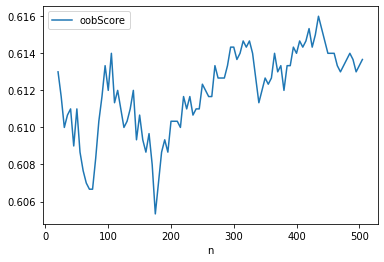

In [31]:
pd.DataFrame({
    'n': n_estimator, 
    'oobScore': oobScores
}).plot(x='n', y='oobScore')

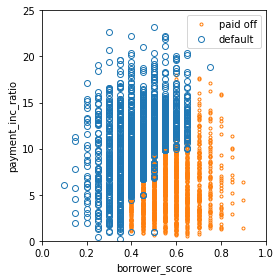

In [32]:
predictions = X.copy()
predictions['prediction'] = rf.predict(X)
predictions.head()

fig, ax = plt.subplots(figsize=(4, 4))

predictions.loc[predictions.prediction=='paid off'].plot(
    x='borrower_score', y='payment_inc_ratio', style='.',
    markerfacecolor='none', markeredgecolor='C1', ax=ax)
predictions.loc[predictions.prediction=='default'].plot(
    x='borrower_score', y='payment_inc_ratio', style='o',
    markerfacecolor='none', markeredgecolor='C0', ax=ax)
ax.legend(['paid off', 'default']);
ax.set_xlim(0, 1)
ax.set_ylim(0, 25)
ax.set_xlabel('borrower_score')
ax.set_ylabel('payment_inc_ratio')

plt.tight_layout()
plt.show()

The random forest method is a “black box” method. It produces more accurate predictions than a simple tree, but the simple tree’s intuitive decision rules are lost. The random forest predictions are also somewhat noisy

### Variable importance

The power of the random forest algorithm shows itself when you build predictive models for data with many features and records. It has the ability to automatically determine which predictors are important and discover complex relationships between predictors corresponding to interaction terms

In [34]:
load_data = pd.read_csv('/Users/boyuan/Desktop/OneDrive/practical-statistics-for-data-scientists-master/data/loan_data.csv.gz', compression = 'gzip')

predictors = ['loan_amnt', 'term', 'annual_inc', 'dti', 
              'payment_inc_ratio', 'revol_bal', 'revol_util', 
              'purpose', 'delinq_2yrs_zero', 'pub_rec_zero', 
              'open_acc', 'grade', 'emp_length', 'purpose_', 
              'home_', 'emp_len_', 'borrower_score']
outcome = 'outcome'

X = pd.get_dummies(load_data[predictors], drop_first = True)
y = load_data[outcome]

rf_all = RandomForestClassifier(n_estimators = 500, random_state = 1)
rf_all.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [35]:
rf_all_entropy = RandomForestClassifier(n_estimators=500, random_state=1,
                                        criterion='entropy')
print(rf_all_entropy.fit(X, y))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)


In [40]:
from collections import defaultdict
from sklearn.model_selection import train_test_split
from sklearn import metrics


rf = RandomForestClassifier(n_estimators=500)
scores = defaultdict(list)
 
# crossvalidate the scores on a number of different random splits of the data
for _ in range(3):
    train_X, valid_X, train_y, valid_y = train_test_split(X, y, 
                                                          test_size=0.3)
    rf.fit(train_X, train_y)
    acc = metrics.accuracy_score(valid_y, rf.predict(valid_X))
    for column in X.columns:
        X_t = valid_X.copy()
        X_t[column] = np.random.permutation(X_t[column].values)
        shuff_acc = metrics.accuracy_score(valid_y, rf.predict(X_t))
        scores[column].append((acc-shuff_acc)/acc)
print('Features sorted by their score:')
print(sorted([(round(np.mean(score), 4), feat) for
              feat, score in scores.items()], reverse=True))

Features sorted by their score:
[(0.0705, 'borrower_score'), (0.0347, 'grade'), (0.031, 'term_60 months'), (0.0131, 'annual_inc'), (0.0098, 'payment_inc_ratio'), (0.0048, 'dti'), (0.004, 'home__RENT'), (0.0036, 'revol_util'), (0.0033, 'purpose__small_business'), (0.0018, 'open_acc'), (0.0016, 'purpose_small_business'), (0.0012, 'revol_bal'), (0.0012, 'delinq_2yrs_zero'), (0.0009, 'purpose__debt_consolidation'), (0.0008, 'purpose__other'), (0.0006, 'purpose_wedding'), (0.0005, 'emp_length'), (0.0004, 'purpose_debt_consolidation'), (0.0003, 'purpose_vacation'), (0.0003, 'home__OWN'), (0.0002, 'purpose_medical'), (0.0002, 'purpose_house'), (0.0001, 'purpose_home_improvement'), (0.0001, 'purpose__medical'), (0.0001, 'pub_rec_zero'), (-0.0, 'purpose_other'), (-0.0, 'purpose_moving'), (0.0, 'purpose_credit_card'), (-0.0001, 'emp_len__ > 1 Year'), (-0.0003, 'purpose__home_improvement'), (-0.0004, 'purpose_major_purchase'), (-0.0005, 'purpose__major_purchase'), (-0.0014, 'loan_amnt')]


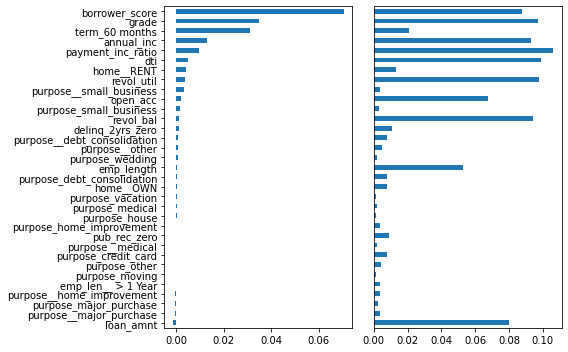

In [41]:
importances = rf_all.feature_importances_

df = pd.DataFrame({
    'feature': X.columns, 
    'Accuracy decrease': [np.mean(scores[column]) for column in 
                         X.columns],
    'Gini decrease': rf_all.feature_importances_, 
    'Entropy decrease': rf_all_entropy.feature_importances_,
})
df = df.sort_values('Accuracy decrease')

fig, axes = plt.subplots(ncols=2, figsize=(8, 5))
ax = df.plot(kind='barh', x='feature', y='Accuracy decrease', 
             legend=False, ax=axes[0])
ax.set_ylabel('')

ax = df.plot(kind='barh', x='feature', y='Gini decrease', 
             legend=False, ax=axes[1])
ax.set_ylabel('')
ax.get_yaxis().set_visible(False)

plt.tight_layout()
plt.show()

There are two ways to measure variable importance:
1. By the decrease in accuracy of the model if the values of a variable are randomly permuted (type=1). Randomly permuting the values has the effect of removing all predictive power for that variable. The accuracy is computed from the out-of-bag data (so this measure is effectively a cross-validated estimate).
2. By the mean decrease in the Gini impurity score for all of the nodes that were split on a variable (type=2). This measures how much including that variable improves the purity of the nodes. This measure is based on the training set and is therefore less reliable than a measure calculated on out-of-bag data.

Since the accuracy decrease is a more reliable metric, why should we use the Gini impurity decrease measure? By default, randomForest computes only this Gini impurity: Gini impurity is a byproduct of the algorithm, whereas model accuracy by variable requires extra computations (randomly permuting the data and predicting this data). In cases where computational complexity is important, such as in a production setting where thousands of models are being fit, it may not be worth the extra computational effort. In addition, the Gini decrease sheds light on which variables the random forest is using to make its splitting rules (recall that this information, readily visible in a simple tree, is effectively lost in a random forest).

### Hyperparameters

The random forest, as with many statistical machine learning algorithms, can be considered a black-box algorithm with knobs to adjust how the box works. These knobs are called hyperparameters, which are parameters that you need to set before fitting a model; they are not optimized as part of the training process. While traditional statistical models require choices (e.g., the choice of predictors to use in a regression model), the hyperparameters for random forest are more critical, especially to avoid overfitting.

In particular, the two most important hyperparameters for the random forest are:
1. nodesize/min_samples_leaf: The minimum size for terminal nodes (leaves in the tree)
2. maxnodes/max_leaf_nodes: The maximum number of nodes in each decision tree

Cross-validation can be used to test the effects of setting different values for hyperparameters 

## 6.4 Boosting 

Ensemble models have become a standard tool for predictive modeling. Boosting is a general technique to create an ensemble of models. It was developed around the same time as bagging. Like bagging, boosting is most commonly used with decision trees. Despite their similarities, boosting takes a very different approach—one that comes with many more bells and whistles. As a result, while bagging can be done with relatively little tuning, boosting requires much greater care in its application. If these two methods were cars, bagging could be considered a Honda Accord (reliable and steady), whereas boosting could be considered a Porsche (powerful but requires more care).

In linear regression models, the residuals are often examined to see if the fit can be improved. Boosting takes this concept much further and fits a series of models, in which each successive model seeks to minimize the error of the previous model. Several variants of the algorithm are commonly used: Adaboost, gradient boosting, and stochastic gradient boosting. The latter, stochastic gradient boosting, is the most general and widely used. Indeed, with the right choice of parameters, the algorithm can emulate the random forest.

**Terminologies:** 

Boosting: A general technique to fit a sequence of models by giving more weight to the records with large residuals for each successive round

Adaboost: An early version of boosting that reweights the data based on the residuals.

Gradient boosting: more general form of boosting that is cast in terms of minimizing a cost function

Stochastic gradient boosting: The most general algorithm for boosting that incorporates resampling of records and columns in each round

Regularization: A technique to avoid overfitting by adding a penalty term to the cost function on the number of parameters in the model

### The boosting algorithm

There are various boosting algorithms, and the basic idea behind all of them is essentially the same. The easiest to understand is Adaboost:
1. Initialize M, the maximum number of models to be fit, and set the iteration counter m = 1. Initialize the observation weights wi = 1/N for i = 1, 2, ...,N. Initialize the ensemble model ˆF0 = 0.
2. Using the observation weights w1,w2, ...,wN, train a model ˆ f m that minimizes the weighted error em defined by summing the weights for the misclassified observations.
3. Add the model to the ensemble: ^Fm = ˆFm−1 + αm ˆfm where αm = log 1−em / em
4. Update the weights w1,w2, ...,wN so that the weights are increased for the observations that were misclassified. The size of the increase depends on αm, with larger values of αm leading to bigger weights
5. Increment the model counter m = m + 1. If m ≤ M, go to step 2

The boosted estimate is given by: 

^F = α1 ˆf1 + α2 ˆf2 +⋯+ αM ˆfM

By increasing the weights for the observations that were misclassified, the algorithm forces the models to train more heavily on the data for which it performed poorly. The factor αm ensures that models with lower error have a bigger weight.

Gradient boosting is similar to Adaboost but casts the problem as an optimization of a cost function. Instead of adjusting weights, gradient boosting fits models to a pseudo-residual, which has the effect of training more heavily on the larger residuals.

In the spirit of the random forest, stochastic gradient boosting adds randomness to the algorithm by sampling observations and predictor variables at each stage

### XGBoost

XGBoost, an implementation of stochastic gradient boosting originally developed by Tianqi Chen and Carlos Guestrin at the University of Washington

The method xgboost has many parameters that can, and should, be adjusted. Two very important parameters are subsample, which controls the fraction of observations that should be sampled at each iteration, and eta, a shrinkage factor applied to αm in the boosting algorithm. Using subsample makes boosting act like the random forest except that the sampling is done without replacement. The shrinkage parameter eta is helpful to prevent overfitting by reducing the change in the weights (a smaller change in the weights means the algorithm is less likely to overfit to the training set).

Note that xgboost does not support the formula syntax, so the predictors need to be converted to a data.matrix and the response needs to be converted to 0/1 variables

In [57]:
from xgboost import XGBClassifier

predictors = ['borrower_score', 'payment_inc_ratio']
outcome = 'outcome'

X = loan3000[predictors]
y = loan3000[outcome]

xgb = XGBClassifier(objective='binary:logistic', subsample=.63)
print(xgb.fit(X, y))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=0.63,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [58]:
xgb_df = X.copy()
xgb_df['prediction'] = xgb.predict(X)
xgb_df['prob_default'] = xgb.predict_proba(X)[:, 0]
print(xgb_df.head())

   borrower_score  payment_inc_ratio prediction  prob_default
0            0.40            5.11135   paid off      0.171144
1            0.40            5.43165    default      0.739844
2            0.70            9.23003    default      0.679195
3            0.40            2.33482   paid off      0.321995
4            0.45           12.10320    default      0.859796


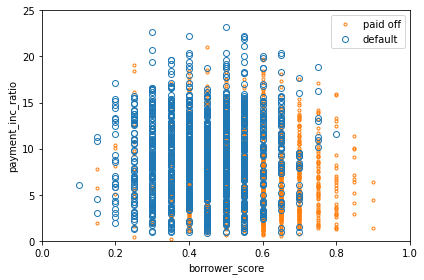

In [59]:
fig, ax = plt.subplots(figsize=(6, 4))

xgb_df.loc[xgb_df.prediction=='paid off'].plot(
    x='borrower_score', y='payment_inc_ratio', style='.', 
    markerfacecolor='none', markeredgecolor='C1', ax=ax)
xgb_df.loc[xgb_df.prediction=='default'].plot(
    x='borrower_score', y='payment_inc_ratio', style='o', 
    markerfacecolor='none', markeredgecolor='C0', ax=ax)
ax.legend(['paid off', 'default']);
ax.set_xlim(0, 1)
ax.set_ylim(0, 25)
ax.set_xlabel('borrower_score')
ax.set_ylabel('payment_inc_ratio')

plt.tight_layout()
plt.show()

### Regularization: avoiding overfitting

Blind application of xgboost can lead to unstable models as a result of overfitting to the training data. The problem with overfitting is twofold:
1. The accuracy of the model on new data not in the training set will be degraded.
2. The predictions from the model are highly variable, leading to unstable results

Any modeling technique is potentially prone to overfitting. For example, if too many variables are included in a regression equation, the model may end up with spurious predictions. However, for most statistical techniques, overfitting can be avoided by a judicious selection of predictor variables. Even the random forest generally produces a reasonable model without tuning the parameters. This, however, is not the case for xgboost

In [60]:
predictors = ['loan_amnt', 'term', 'annual_inc', 'dti', 
              'payment_inc_ratio', 'revol_bal', 'revol_util', 
              'purpose', 'delinq_2yrs_zero', 'pub_rec_zero', 
              'open_acc', 'grade', 'emp_length', 'purpose_', 
              'home_', 'emp_len_', 'borrower_score']
outcome = 'outcome'

X = pd.get_dummies(loan_data[predictors], drop_first=True)
y = pd.Series([1 if o == 'default' else 0 for o in loan_data[outcome]])

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=10000)

xgb_default = XGBClassifier(objective='binary:logistic', n_estimators=250, max_depth=6,
                            reg_lambda=0, learning_rate=0.3, subsample=1)
xgb_default.fit(train_X, train_y)

xgb_penalty = XGBClassifier(objective='binary:logistic', n_estimators=250, max_depth=6,
                            reg_lambda=1000, learning_rate=0.1, subsample=0.63)
print(xgb_penalty.fit(train_X, train_y))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=250, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1000, scale_pos_weight=1, subsample=0.63,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [61]:
pred_default = xgb_default.predict_proba(train_X)[:, 1]
error_default = abs(train_y - pred_default) > 0.5
print('default (train): ', np.mean(error_default))

pred_default = xgb_default.predict_proba(valid_X)[:, 1]
error_default = abs(valid_y - pred_default) > 0.5
print('default: ', np.mean(error_default))

pred_penalty = xgb_penalty.predict_proba(valid_X)[:, 1]
error_penalty = abs(valid_y - pred_penalty) > 0.5
print('penalty: ', np.mean(error_penalty))

default (train):  0.12127214079565389
default:  0.3577
penalty:  0.3286


The test set consists of 10,000 randomly sampled records from the full data, and the training set consists of the remaining records. Boosting leads to an error rate of only 13.3% for the training set. The test set, however, has a much higher error rate of 35.3%. This is a result of overfitting: while boosting can explain the variability in the training set very well, the prediction rules do not apply to new data.

Boosting provides several parameters to avoid overfitting, including the parameters eta (or learning_rate) and subsample. Another approach is regularization, a technique that modifies the cost function in order to penalize the complexity of the model. Decision trees are fit by minimizing cost criteria such as Gini’s impurity score. In xgboost, it is possible to modify the cost function by adding a term that measures the complexity of the model.

There are two parameters in xgboost to regularize the model: alpha and lambda, which correspond to Manhattan distance (L1-regularization) and squared Euclidean distance (L2- regularization), respectively. Increasing these parameters will penalize more complex models and reduce the size of the trees that are fit

In [62]:
results = []
for ntree_limit in range(1, 250):
    train_default = xgb_default.predict_proba(train_X, ntree_limit=ntree_limit)[:, 1]
    train_penalty = xgb_penalty.predict_proba(train_X, ntree_limit=ntree_limit)[:, 1]
    pred_default = xgb_default.predict_proba(valid_X, ntree_limit=ntree_limit)[:, 1]
    pred_penalty = xgb_penalty.predict_proba(valid_X, ntree_limit=ntree_limit)[:, 1]
    results.append({
        'iterations': ntree_limit,
        'default train': np.mean(abs(train_y - train_default) > 0.5),
        'penalty train': np.mean(abs(train_y - train_penalty) > 0.5),
        'default test': np.mean(abs(valid_y - pred_default) > 0.5),
        'penalty test': np.mean(abs(valid_y - pred_penalty) > 0.5),
    })

results = pd.DataFrame(results)
print(results.head())

   iterations  default train  penalty train  default test  penalty test
0           1       0.339002       0.335125        0.3467        0.3490
1           2       0.330825       0.336597        0.3433        0.3454
2           3       0.327599       0.337276        0.3414        0.3441
3           4       0.324317       0.337728        0.3362        0.3437
4           5       0.322591       0.336172        0.3385        0.3430


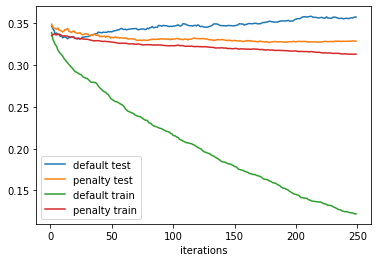

In [63]:
ax = results.plot(x='iterations', y='default test')
results.plot(x='iterations', y='penalty test', ax=ax)
results.plot(x='iterations', y='default train', ax=ax)
results.plot(x='iterations', y='penalty train', ax=ax)
plt.show()

**Ridge regression and the lasso:**

Adding a penalty on the complexity of a model to help avoid overfitting dates back to the 1970s. Least squares regression minimizes the residual sum of squares (RSS). Ridge regression minimizes the sum of squared residuals plus a penalty term that is a function of the number and size of the coefficients

The value of λ determines how much the coefficients are penalized; larger values produce models that are less likely to overfit the data. The Lasso is similar, except that it uses Manhattan distance instead of Euclidean distance as a penalty term:

The xgboost parameters lambda (reg_lambda) and alpha (reg_alpha) are acting in a similar manner.

Using Euclidean distance is also known as L2 regularization, and using Manhattan distance as L1 regularization. The xgboost parameters lambda (reg_lambda) and alpha (reg_alpha) are acting in a similar manner.

### Hyperparameters and cross-validation 

Cross-validation randomly splits up the data into K different groups, also called folds. For each fold, a model is trained on the data not in the fold and then evaluated on the data in the fold. This yields a measure of accuracy of the model on out-of-sample data. The best set of hyperparameters is the one given by the model with the lowest overall error as computed by averaging the errors from each of the folds.

In [64]:
idx = np.random.choice(range(5), size=len(X), replace=True)
error = []
for eta, max_depth in product([0.1, 0.5, 0.9], [3, 6, 9]):
    xgb = XGBClassifier(objective='binary:logistic', n_estimators=250, 
                        max_depth=max_depth, learning_rate=eta)
    cv_error = []
    for k in range(5):
        fold_idx = idx == k
        train_X = X.loc[~fold_idx]; train_y = y[~fold_idx]
        valid_X = X.loc[fold_idx]; valid_y = y[fold_idx]

        xgb.fit(train_X, train_y)
        pred = xgb.predict_proba(valid_X)[:, 1]
        cv_error.append(np.mean(abs(valid_y - pred) > 0.5))
    error.append({
        'eta': eta,
        'max_depth': max_depth,
        'avg_error': np.mean(cv_error)
    })
    print(error[-1])
errors = pd.DataFrame(error)
print(errors)

{'eta': 0.1, 'max_depth': 3, 'avg_error': 0.32806214758928964}
{'eta': 0.1, 'max_depth': 6, 'avg_error': 0.33521089854699776}
{'eta': 0.1, 'max_depth': 9, 'avg_error': 0.3452683741745092}
{'eta': 0.5, 'max_depth': 3, 'avg_error': 0.33906043192375007}
{'eta': 0.5, 'max_depth': 6, 'avg_error': 0.3691030152925567}
{'eta': 0.5, 'max_depth': 9, 'avg_error': 0.3724987896787109}
{'eta': 0.9, 'max_depth': 3, 'avg_error': 0.3534140597279456}
{'eta': 0.9, 'max_depth': 6, 'avg_error': 0.3931219233499942}
{'eta': 0.9, 'max_depth': 9, 'avg_error': 0.38681767310825554}
   eta  max_depth  avg_error
0  0.1          3   0.328062
1  0.1          6   0.335211
2  0.1          9   0.345268
3  0.5          3   0.339060
4  0.5          6   0.369103
5  0.5          9   0.372499
6  0.9          3   0.353414
7  0.9          6   0.393122
8  0.9          9   0.386818


In [65]:
print(errors.pivot_table(index='eta', columns='max_depth', values='avg_error') * 100)

max_depth          3          6          9
eta                                       
0.1        32.806215  33.521090  34.526837
0.5        33.906043  36.910302  37.249879
0.9        35.341406  39.312192  38.681767


**XGBoost hyperparameters:**
1. eta/learning_rate: The shrinkage factor between 0 and 1 applied to α in the boosting algorithm. The default is 0.3, but for noisy data, smaller values are recommended (e.g., 0.1). In Python, the default value is 0.1.
2. nrounds/n_estimators: The number of boosting rounds. If eta is set to a small value, it is important to increase the number of rounds since the algorithm learns more slowly. As long as some parameters are included to prevent overfitting, having more rounds doesn’t hurt
3. max_depth: The maximum depth of the tree (the default is 6). In contrast to the random forest, which fits very deep trees, boosting usually fits shallow trees. This has the advantage of avoiding spurious complex interactions in the model that can arise from noisy data. In Python, the default is 3
4. subsample and colsample_bytree: Fraction of the records to sample without replacement and the fraction of predictors to sample for use in fitting the trees. These parameters, which are similar to those in random forests, help avoid overfitting. The default is 1.0
5. lambda/reg_lambda and alpha/reg_alpha: The regularization parameters to help control overfitting. Default values for Python are reg_lambda=1 and reg_alpha=0. In R, both values have default of 0.